In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings as wn

wn.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        print(path)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gold-price-data/gld_price_data.csv


In [20]:
df = pd.read_csv(path)
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


# Data Set Description

1. **Date**: The specific date of the data entry.
2. **SPX**: The closing price of the S&P 500 index, a measure of the performance of 500 large companies listed on stock exchanges in the United States.
3. **GLD**: The closing price of SPDR Gold Shares (GLD), an exchange-traded fund (ETF) that tracks the price of gold.
4. **USO**: The closing price of the United States Oil Fund (USO), an ETF that tracks the price of crude oil.
5. **SLV**: The closing price of iShares Silver Trust (SLV), an ETF that tracks the price of silver.
6. **EUR/USD**: The exchange rate between the Euro and the US Dollar.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [22]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099


# Data Analysis

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

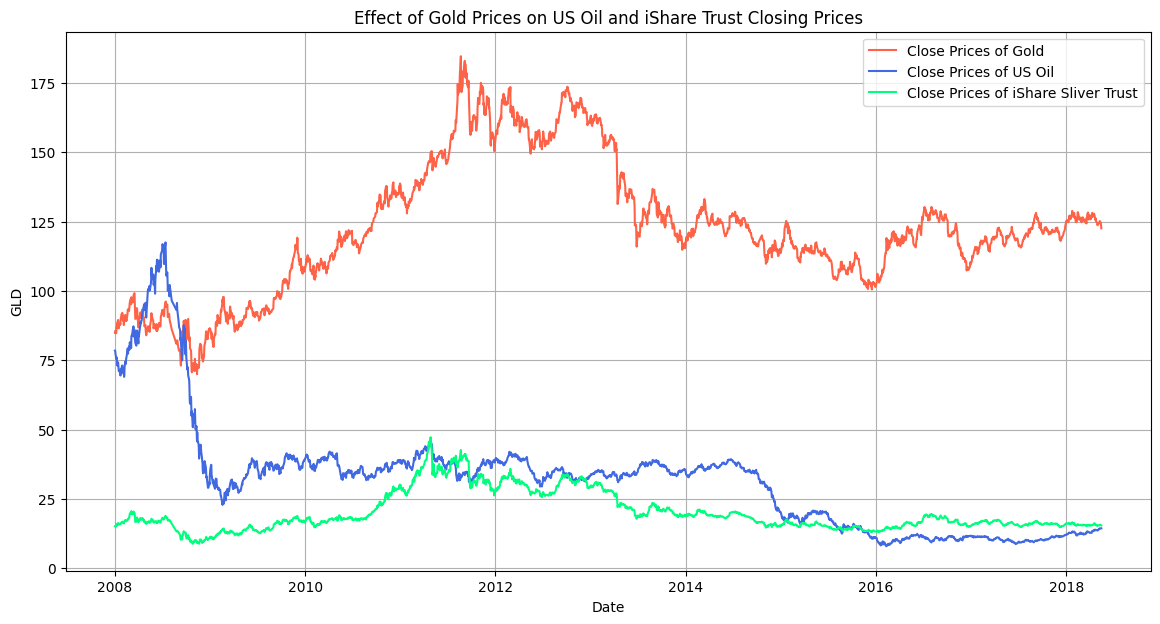

In [34]:
plt.figure(figsize=(14,7))
sns.lineplot(
    data = df,
    x = df['Date'],
    y = df['GLD'],
    color='tomato',
    label='Close Prices of Gold'
)

sns.lineplot(
    data = df,
    x = df['Date'],
    y = df['USO'],
    color='royalblue',
    label='Close Prices of US Oil'
)

sns.lineplot(
    data = df,
    x = df['Date'],
    y = df['SLV'],
    color='springgreen',
    label='Close Prices of iShare Sliver Trust'
)

plt.title('Effect of Gold Prices on US Oil and iShare Trust Closing Prices')
plt.legend()
plt.grid()
plt.show()

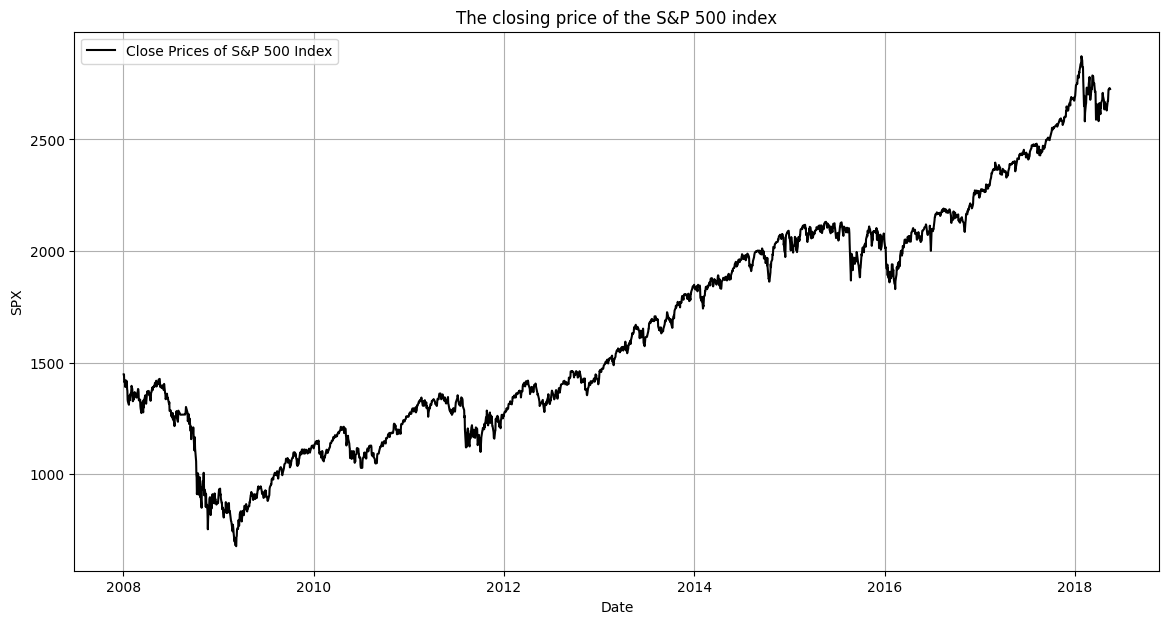

In [38]:
plt.figure(figsize=(14,7))
sns.lineplot(
    data = df,
    x = df['Date'],
    y = df['SPX'],
    color='black',
    label='Close Prices of S&P 500 Index'
)
plt.title('The closing price of the S&P 500 index')
plt.legend()
plt.grid()
plt.show()

# 

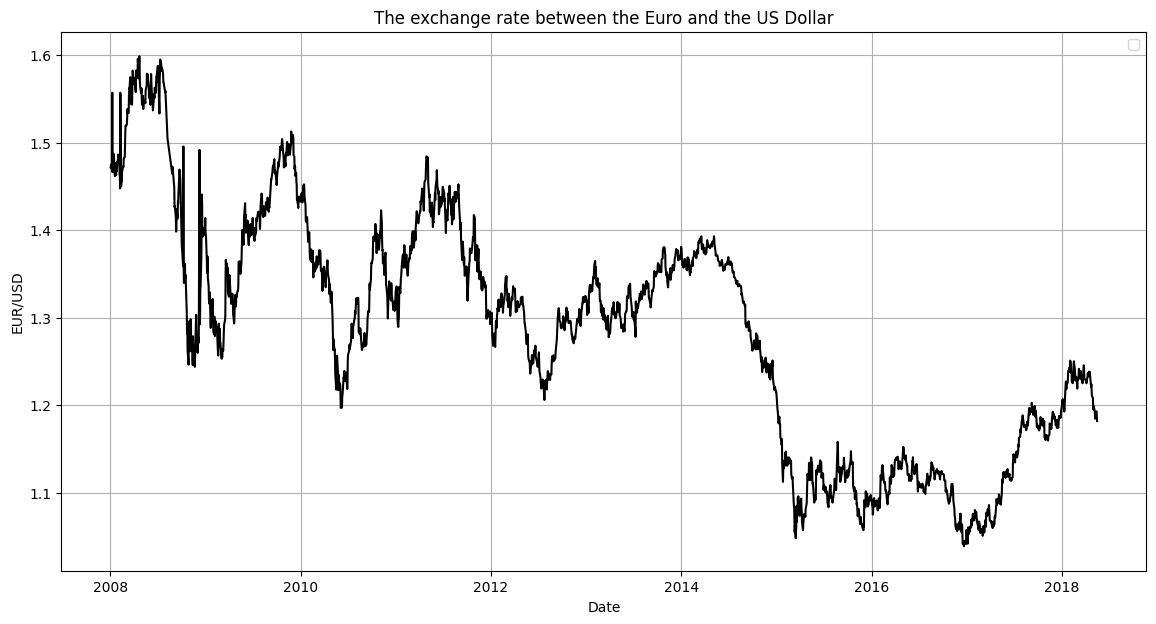

In [40]:
plt.figure(figsize=(14,7))
sns.lineplot(
    data = df,
    x = df['Date'],
    y = df['EUR/USD'],
    color='black',
)
plt.title('The exchange rate between the Euro and the US Dollar')
plt.legend()
plt.grid()
plt.show()

# Feature Engineering

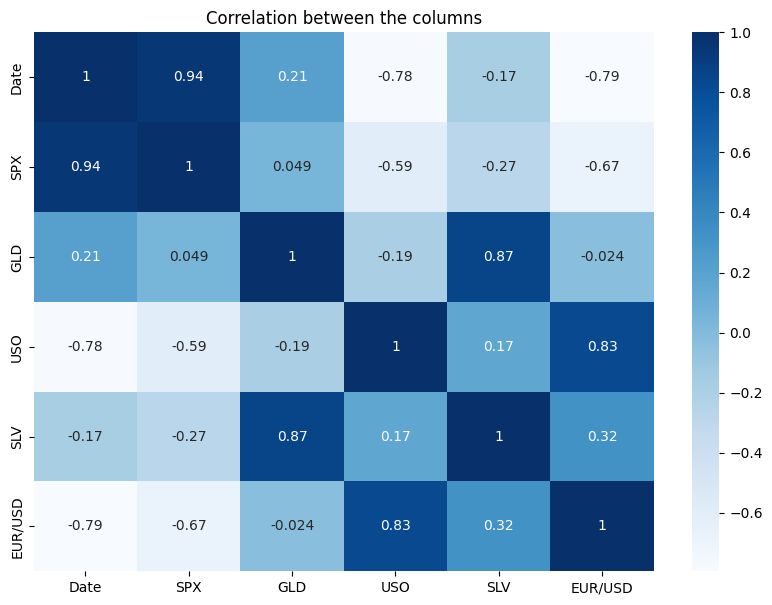

In [45]:
# check correlation between columns
plt.figure(figsize=(10,7))
sns.heatmap(
    df.corr(),
    cmap='Blues',
    annot=True
)
plt.title('Correlation between the columns')
plt.show()

# Split the Features on Format of Dataset

In [60]:
from sklearn.model_selection import train_test_split

In [52]:
def create_feature_target_dataframe(df, column, window_size=5):
    values = df[column].values
    
    # Initialize lists to store the feature rows and targets
    features = []
    targets = []
    columns = []

    # Loop through the values, taking 5 values as features and the 6th as the target
    for i in range(len(values) - window_size):
        feature_row = values[i:i+window_size]
        target = values[i+window_size]
        
        # Append the feature row and target to the respective lists
        features.append(feature_row)
        targets.append(target)

    for i in range(window_size):
        col = f"x{i+1}"
        columns.append(col)
        
    # Create a new DataFrame from the feature rows and targets
    new_df = pd.DataFrame(features, columns=columns)
    new_df['target'] = targets
    
    return new_df

In [54]:
series_df = create_feature_target_dataframe(
    df = df,
    column = 'GLD',
    window_size=3
)
series_df.head(10)

,x1,x2,x3,target
0,84.860001,85.570000,85.129997,84.769997
1,85.570000,85.129997,84.769997,86.779999
2,85.129997,84.769997,86.779999,86.550003
3,84.769997,86.779999,86.550003,88.250000
4,86.779999,86.550003,88.250000,88.580002
5,86.550003,88.250000,88.580002,89.540001
6,88.250000,88.580002,89.540001,87.989998
7,88.580002,89.540001,87.989998,86.699997
8,89.540001,87.989998,86.699997,86.500000
9,87.989998,86.699997,86.500000,87.419998


In [57]:
x = series_df.drop('target',axis=1)
y = series_df['target']

x.shape,y.shape

((2287, 3), (2287,))

In [117]:
x_train,x_test,y_train,y_test = train_test_split(
    x,y,
    test_size=0.1,
    shuffle=False
)

x_train.shape, x_test.shape

((2058, 3), (229, 3))

In [118]:
x_train

,x1,x2,x3
0,84.860001,85.570000,85.129997
1,85.570000,85.129997,84.769997
2,85.129997,84.769997,86.779999
3,84.769997,86.779999,86.550003
4,86.779999,86.550003,88.250000
...,...,...,...
2053,122.599998,122.239998,122.820000
2054,122.239998,122.820000,121.730003
2055,122.820000,121.730003,121.959999
2056,121.730003,121.959999,121.480003


# LSTMs Architecture for Forecasting the Gold Prices

In [119]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dropout,Dense
from keras.optimizers import Adam

In [120]:
x_train = np.array(x_train)
x_test =np.array(x_test)

x_train = x_train.reshape((x_train.shape[0],1,x_train.shape[1]))
x_test = x_test.reshape((x_test.shape[0],1,x_test.shape[1]))

x_train.shape,x_test.shape

((2058, 1, 3), (229, 1, 3))

In [121]:
model = Sequential()
model.add(Bidirectional(LSTM(units=50, activation='tanh',return_sequences=True ,input_shape=(x_train.shape[1],x_train.shape[2]))))
model.add(Bidirectional(LSTM(units=40,activation='tanh')))
model.add(Dense(units=1,activation='linear'))
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='mse'
)
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_10                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_11                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [122]:
history = model.fit(
    x= x_train,
    y = y_train,
    batch_size=1,
    epochs=30,
    validation_data=(x_test,y_test)
)

Epoch 1/30
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - loss: 13666.8652 - val_loss: 9769.7617
Epoch 2/30
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 9914.0654 - val_loss: 7530.3638
Epoch 3/30
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 7698.1396 - val_loss: 5672.0195
Epoch 4/30
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 5608.6221 - val_loss: 4101.4731
Epoch 5/30
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 4316.7471 - val_loss: 2829.7917
Epoch 6/30
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 3164.6641 - val_loss: 1839.2936
Epoch 7/30
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 2175.7651 - val_loss: 1096.3459
Epoch 8/30
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 1646.4919 - val_loss: 600.5733
Epoch 9/30
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 1028.5128 - val_loss: 290.2896
Epoch 10/30
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 805.1027 - val_loss: 133.0744
Epoch 11/30
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss

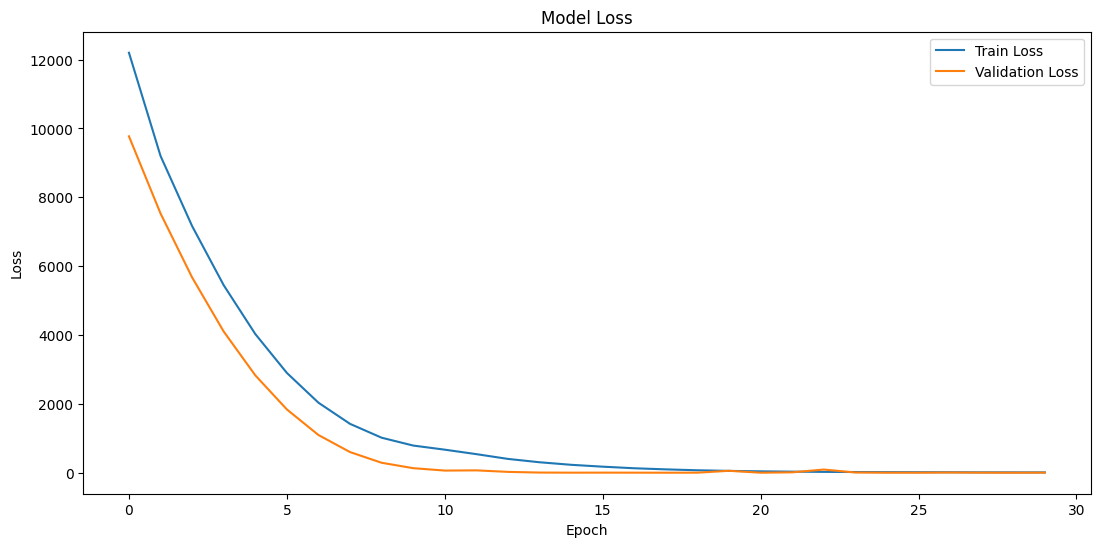

In [123]:
plt.figure(figsize=(13,6))


y_pred = model.predict(x_test, verbose=0)
y_test = np.array(y_test)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [124]:
y_pred = model.predict(x_test, verbose=0)
y_test = np.array(y_test)

y_pred.shape,y_test.shape

((229, 1), (229,))

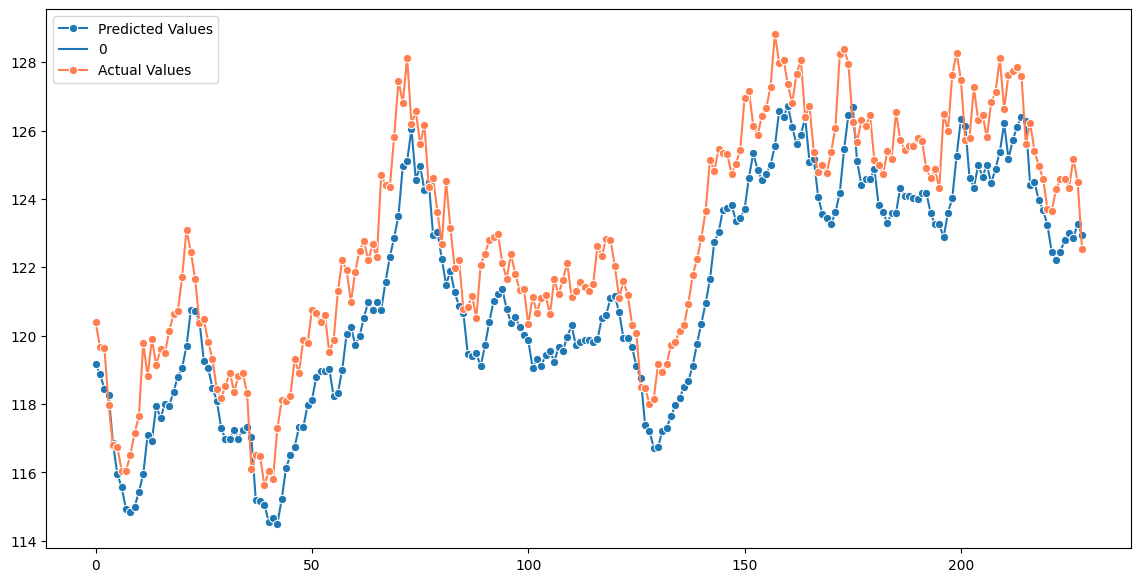

In [125]:
plt.figure(figsize=(14,7))
sns.lineplot(y_pred, label='Predicted Values', marker='o',color='royalblue')
sns.lineplot(y_test, label='Actual Values',marker='o',color='coral')
plt.legend()
plt.show()

# Forecasting the Next 10 Days

In [ ]:
last_entry = np.array([dataset_name].tail(1))

# Forecasting parameters
num_forecasts = 10
forecast_list = []
window_size = 6

    # Generate forecasts
for _ in range(num_forecasts):
    # Predict the next value
    predicted_value = np.round(models[model_name].predict(last_entry))[0]
        
    # Update the sliding window
    window_values = list(last_entry[0, -(window_size-1):])
    window_values.append(predicted_value)
    last_entry = np.array([window_values])
        
    # Store the forecasted value
    forecast_list.append(predicted_value)